# Correlation, Causality and multiCollinearity

For a good explanation, see: 

https://www.otexts.org/fpp/5/7

Let's stop and check that out.

### Some bus ridership data

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
# This data has
data = pd.read_csv('data/MuniEstFile2015.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3679 entries, 0 to 3678
Data columns (total 35 columns):
Unnamed: 0                  3679 non-null int64
ID                          3679 non-null object
SFTAZ                       3679 non-null int64
MODE                        3679 non-null object
TOD2                        3679 non-null object
YEAR                        3679 non-null int64
DIST                        3679 non-null int64
DISTNAME                    3679 non-null object
AVG_RIDE                    3679 non-null float64
ROUTES                      3679 non-null int64
STOPS                       3679 non-null int64
TRIP_STOPS                  3679 non-null int64
TRIP_STOPS_DELIVERED        3679 non-null float64
RAPID_SHARE                 3679 non-null float64
SERVMILES_S_DELIVERED       3679 non-null float64
RUNSPEED                    3679 non-null float64
ONTIME5                     3679 non-null float64
BUS_TRIP_STOPS_COMPETING    3679 non-null float64
HHLDS      

In [3]:
# start from a basic model

mod = smf.ols(formula='AVG_RIDE \
              ~ POP \
              + TOTALEMP \
              + ROUTES \
              + TRIP_STOPS ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVG_RIDE   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     489.0
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:58:17   Log-Likelihood:                -25926.
No. Observations:                3679   AIC:                         5.186e+04
Df Residuals:                    3674   BIC:                         5.189e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -72.1207     10.346     -6.971      0.0

In [4]:
# start from a basic model

mod = smf.ols(formula='AVG_RIDE \
              ~ POP_SMOOTH \
              + TOTALEMP_SMOOTH \
              + ROUTES \
              + TRIP_STOPS ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVG_RIDE   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     501.9
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:58:24   Log-Likelihood:                -25909.
No. Observations:                3679   AIC:                         5.183e+04
Df Residuals:                    3674   BIC:                         5.186e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -89.1884      8.546    -

In [5]:
# what happens if I add the number of stops? 
# notice what happens to the TRIP_STOPS variable? 

mod = smf.ols(formula='AVG_RIDE \
              ~ POP_SMOOTH \
              + TOTALEMP_SMOOTH \
              + ROUTES \
              + STOPS \
              + TRIP_STOPS ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVG_RIDE   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     512.6
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:58:30   Log-Likelihood:                -25737.
No. Observations:                3679   AIC:                         5.149e+04
Df Residuals:                    3673   BIC:                         5.152e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.5224      9.225     

In [6]:
# how can I get around this problem? 
# that's better, but what's going on with employment?

data['TRIPS_PER_STOP'] = data['TRIP_STOPS'] / data['STOPS']

mod = smf.ols(formula='AVG_RIDE \
              ~ POP_SMOOTH \
              + TOTALEMP_SMOOTH \
              + ROUTES \
              + STOPS \
              + TRIPS_PER_STOP ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVG_RIDE   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     601.3
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:58:39   Log-Likelihood:                -25611.
No. Observations:                3679   AIC:                         5.123e+04
Df Residuals:                    3673   BIC:                         5.127e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -231.9468     10.066    -

In [7]:
# employees per stop
data['EMP_PER_STOP'] = data['TOTALEMP_SMOOTH'] / data['STOPS']

mod = smf.ols(formula='AVG_RIDE \
              ~ POP_SMOOTH \
              + EMP_PER_STOP \
              + ROUTES \
              + STOPS \
              + TRIPS_PER_STOP ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVG_RIDE   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     604.0
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:58:53   Log-Likelihood:                -25607.
No. Observations:                3679   AIC:                         5.123e+04
Df Residuals:                    3673   BIC:                         5.126e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -230.1599     10.054    -22.

In [8]:
# maybe I can model riders per stop instead

data['AVG_RIDE_PER_STOP'] = data['AVG_RIDE'] / data['STOPS']

mod = smf.ols(formula='AVG_RIDE_PER_STOP \
              ~ POP_SMOOTH \
              + TOTALEMP_SMOOTH \
              + ROUTES \
              + TRIPS_PER_STOP ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      AVG_RIDE_PER_STOP   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     569.9
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:58:58   Log-Likelihood:                -23942.
No. Observations:                3679   AIC:                         4.789e+04
Df Residuals:                    3674   BIC:                         4.793e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -87.9138      5.428    -

In [9]:
# routes doesn't make sense, so drop it. 

data['AVG_RIDE_PER_STOP'] = data['AVG_RIDE'] / data['STOPS']

mod = smf.ols(formula='AVG_RIDE_PER_STOP \
              ~ POP_SMOOTH \
              + TOTALEMP_SMOOTH \
              + TRIPS_PER_STOP ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      AVG_RIDE_PER_STOP   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     751.8
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:59:07   Log-Likelihood:                -23950.
No. Observations:                3679   AIC:                         4.791e+04
Df Residuals:                    3675   BIC:                         4.793e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -95.6421      5.069    -

In [10]:
# test the effect of ontime performance
# what happens here? 

mod = smf.ols(formula='AVG_RIDE_PER_STOP \
              ~ POP_SMOOTH \
              + TOTALEMP_SMOOTH \
              + TRIPS_PER_STOP \
              + ONTIME5 ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      AVG_RIDE_PER_STOP   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     696.5
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:59:15   Log-Likelihood:                -23792.
No. Observations:                3679   AIC:                         4.759e+04
Df Residuals:                    3674   BIC:                         4.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9539      7.247     

In [11]:
# test the effect of ride-hailing

mod = smf.ols(formula='AVG_RIDE_PER_STOP \
              ~ POP_SMOOTH \
              + TOTALEMP_SMOOTH \
              + TRIPS_PER_STOP \
              + AVG_TNC', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      AVG_RIDE_PER_STOP   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     567.8
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:59:23   Log-Likelihood:                -23945.
No. Observations:                3679   AIC:                         4.790e+04
Df Residuals:                    3674   BIC:                         4.793e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -97.6600      5.102    -

For this model, how many trips will be in a zone with:
1 stop, 20 population, 20 employment, 2 trips per stop, and 0 TNCs?



### Transformations

We didn't actually look at the data.  Let's plot the dependent variable

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


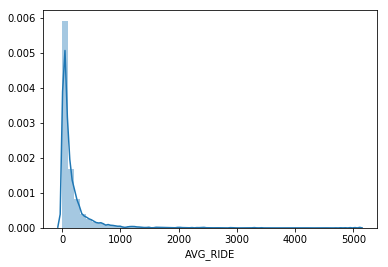

In [12]:
sns.distplot(data['AVG_RIDE'])

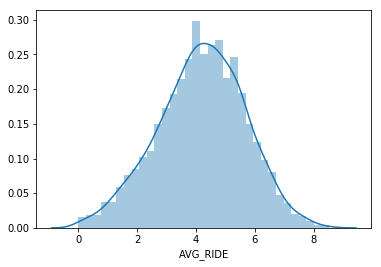

In [13]:
sns.distplot(np.log(1+data['AVG_RIDE']))

In [14]:
# create log transformations for all variables
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if (is_numeric_dtype(data[col])):
        data[col+'_log'] = np.log(1+data[col])

In [15]:
# original linear model

mod = smf.ols(formula='AVG_RIDE \
              ~ POP_SMOOTH \
              + TOTALEMP_SMOOTH \
              + ROUTES \
              + TRIP_STOPS ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVG_RIDE   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     501.9
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:59:45   Log-Likelihood:                -25909.
No. Observations:                3679   AIC:                         5.183e+04
Df Residuals:                    3674   BIC:                         5.186e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -89.1884      8.546    -

In [16]:
# Use the transformed variable on the left-hand side

mod = smf.ols(formula='AVG_RIDE_log \
              ~ POP_SMOOTH \
              + TOTALEMP_SMOOTH \
              + ROUTES \
              + TRIP_STOPS ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           AVG_RIDE_log   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     724.3
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:59:49   Log-Likelihood:                -5604.0
No. Observations:                3679   AIC:                         1.122e+04
Df Residuals:                    3674   BIC:                         1.125e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.8337      0.034     

In [18]:
# Use transformed variables on both sides

mod = smf.ols(formula='AVG_RIDE_log \
              ~ POP_SMOOTH_log \
              + TOTALEMP_SMOOTH_log \
              + ROUTES_log \
              + TRIP_STOPS_log ', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           AVG_RIDE_log   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1312.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:00:11   Log-Likelihood:                -5041.6
No. Observations:                3679   AIC:                         1.009e+04
Df Residuals:                    3674   BIC:                         1.012e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.9959    

In [19]:
# Go back and test TNCs

mod = smf.ols(formula='AVG_RIDE_log \
              ~ POP_SMOOTH_log \
              + TOTALEMP_SMOOTH_log \
              + ROUTES_log \
              + TRIP_STOPS_log \
              + AVG_TNC_log', 
              data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           AVG_RIDE_log   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:00:48   Log-Likelihood:                -5036.0
No. Observations:                3679   AIC:                         1.008e+04
Df Residuals:                    3673   BIC:                         1.012e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.9601    

### Recommendations

Our friends at Northwestern (my alma mater!) have some good recommendations for how to 
proceed with these issues. 

Model Specification: Choosing the Right Variables for the Right Hand Side

https://www.kellogg.northwestern.edu/faculty/dranove/htm/dranove/coursepages/Mgmt%20469/choosing%20variables.pdf

They suggest: 

1) Always begin with a “core” set of predictors that have theoretical relevance, as well as any predictors whose effects you are specifically interested in. You may estimate a “quick and dirty” OLS model at this time. 

2) Finalize model specification issues (e.g., log vs. linear)  For a good description of log vs linear models, see: 

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=15&cad=rja&uact=8&ved=2ahUKEwjI0fu82NvoAhXRWM0KHUuVDCkQFjAOegQICBAB&url=https%3A%2F%2Fcanvas.northwestern.edu%2Ffiles%2F1812457%2Fdownload%3Fdownload_frd%3D1%26verifier%3DQBFTMd2yRHbWR6yC6mp2s0in7G9N3rRZiRFStMrA&usg=AOvVaw1JP3fLhZJA3IEhBHVFbuRq

3) Add additional predictors that you think might be relevant. You can add them one at a time or one “category” at a time (see next section). Check for the robustness of your initial findings. 

4) When adding predictors, you should keep all the original predictors in the model, even if they were not significant. Remember, omitted variable bias can cause significant predictors to appear to be insignificant. By adding more variables, your key predictors may become significant. 

5) At this point, you should know your robust findings. That is the main goal of your research. 

6) If you insist on producing a “final model”, then you should remove those additional predictors that were not remotely significant.


7) You can also remove core predictors if they remain insignificant and you need degrees of freedom. If you are not taxed for degrees of freedom, you may want to keep your core variables, if only to paint the entire picture for your audience.

### Homework

Write one page describing the data set you are working with for your project, and explaining: 
1. Possible relationships in the data set that may be problematic
2. How you could determine if they actually are a problem
3. How you might mitigate the issue if you determine them to be a problem
